In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Data Collection

In [7]:
dataset=pd.read_csv('/content/insurance.csv')

In [8]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DATA PReprocessing:::

In [10]:
dataset.shape

(1338, 7)

In [11]:
dataset.isnull().sum()
###no missing valuess


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
###finding value in each category
dataset['sex'].value_counts()
dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [18]:
###labeling the category text into numeric form
label=LabelEncoder()
label_data=label.fit_transform(dataset['sex'])
dataset['sex']=label_data


In [19]:
label_data=label.fit_transform(dataset['smoker'])
dataset['smoker']=label_data


In [20]:
label_data=label.fit_transform(dataset['region'])
dataset['region']=label_data

In [21]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [43]:
x=dataset.drop(columns={'charges','sex'},axis=1)
y=dataset['charges']
print(x)
print(y)

      age     bmi  children  smoker  region
0      19  27.900         0       1       3
1      18  33.770         1       0       2
2      28  33.000         3       0       2
3      33  22.705         0       0       1
4      32  28.880         0       0       1
...   ...     ...       ...     ...     ...
1333   50  30.970         3       0       1
1334   18  31.920         0       0       0
1335   18  36.850         0       0       2
1336   21  25.800         0       0       3
1337   61  29.070         0       1       1

[1338 rows x 5 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
x_train.shape
print(y_train)
x_test.shape

1043     3161.45400
968      3279.86855
594      5709.16440
1079    15161.53440
1051    14394.55790
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1003, dtype: float64


(335, 5)

model training

Linear Regression

In [48]:
##Linear regression model selctions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
###predict r2 score of regression model
pre=model.predict(x_test)
r2=r2_score(pre,y_test)
print("Accuracy score for linear regression model is:",r2*100)


Accuracy score for linear regression model is: 64.7593057670259


Lasso Regression ::


In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
model=Lasso(alpha=0.01)
model.fit(x_train,y_train)
###predict r2 score of regression model
pre=model.predict(x_test)
r2_lasso=r2_score(pre,y_test)
print("Accuracy score for linear regression model is:",r2_lasso*100)

Accuracy score for linear regression model is: 64.75913899181029


In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
accu=tree_reg.score(x_test,y_test)
print(accu*100)



83.90857657666126


Visualization:::

Text(0.5, 1.0, 'Score of Different models')

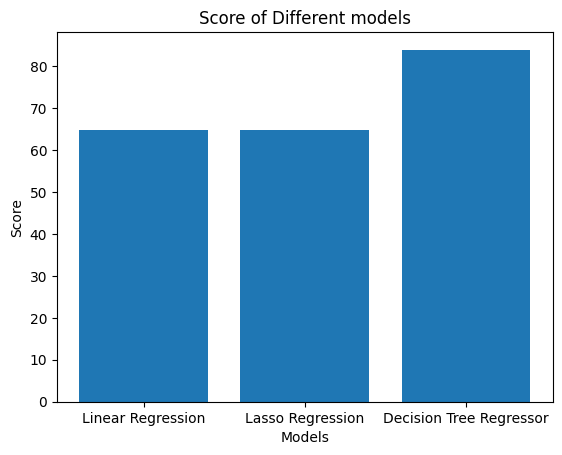

In [70]:
x=[r2*100,r2_lasso*100,accu*100]
y=['Linear Regression','Lasso Regression','Decision Tree Regressor']
plt.bar(y,x)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Score of Different models')